# Limit cycles

In [204]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from phase_space_plotting import plot_traj, plot_field

## Examples

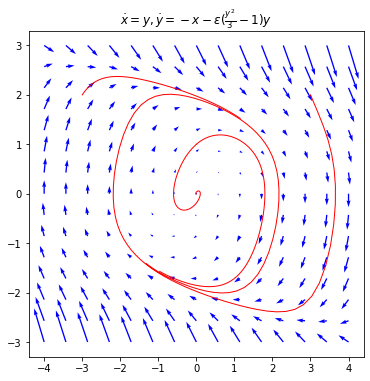

In [3]:
xlim = (-4, 4)
ylim = (-3, 3)

def dx_dt(x, t):
    epsilon = 1.0
    
    return [x[1], - x[0] - epsilon*(x[1]**2 / 3 - 1)*x[1]]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(\\frac{y^2}{3} - 1)y$')

plot_traj([3, 2], dx_dt, fw=10, bw=0, n_time_samples=100)
plot_traj([-3, 2], dx_dt, fw=2, bw=0, n_time_samples=100)
plot_traj([0, 1], dx_dt, fw=4, bw=-10, n_time_samples=100)

plot_field(dx_dt, xlim, ylim, scale=100)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

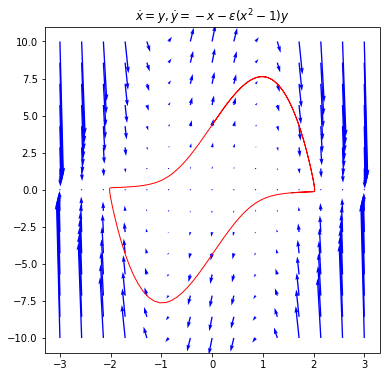

In [4]:
xlim = (-3, 3)
ylim = (-10, 10)

def dx_dt(x, t):
    epsilon = 5.0
    
    return [x[1], - x[0] - epsilon*(x[0]**2 - 1)*x[1]]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(x^2 - 1)y$')

plot_traj([0.03864691, 4.56820213], dx_dt, fw=15, bw=0, n_time_samples=1000)

plot_field(dx_dt, xlim, ylim, scale=1000)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

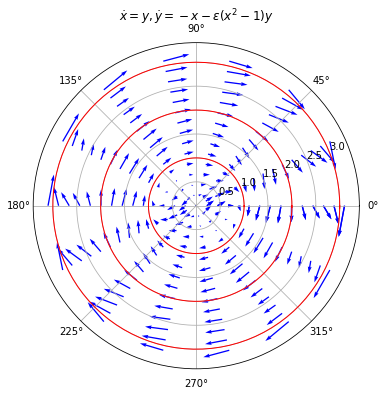

In [79]:
xlim = (0, 2*np.pi)
ylim = (0, 3.1)

def dx_dt(x, t):
    return [-1, x[1]*(1 - x[1])*(2 - x[1])*(3 - x[1])]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
ax.set_title('$\\dot{x} = y, \\dot{y} = -x -\\epsilon(x^2 - 1)y$')

plot_traj([0, 1], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)
plot_traj([0, 2], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)
plot_traj([0, 3], dx_dt, fw=6.3, bw=0, n_time_samples=100, ax=ax)

plot_field(dx_dt, xlim, ylim, scale=40, ax=ax, polar=True)

ax.set_xlim(xlim)
ax.set_ylim(np.array(ylim) * 1.1)

plt.show()

## Poincaré-Bendixson theorem

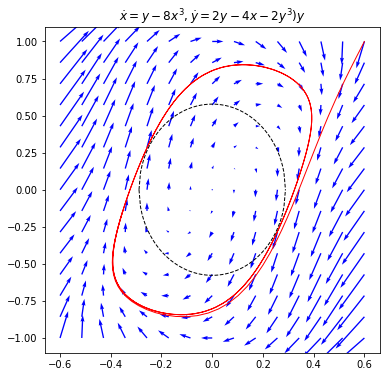

In [86]:
xlim = (-0.6, 0.6)
ylim = (-1, 1)

def dx_dt(x, t):
    return [x[1] - 8*x[0]**3, 2*x[1] - 4*x[0] -2*x[1]**3]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y - 8x^3, \\dot{y} = 2y -4x - 2y^3)y$')

plot_traj([0.6, 1], dx_dt, fw=10, bw=0, n_time_samples=200)

plot_field(dx_dt, xlim, ylim, scale=30)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

xx = np.linspace(-np.sqrt(1/12), np.sqrt(1/12), 100)
plt.plot(xx, np.sqrt((1 - 12*xx**2)/3), color='black', linestyle='--', linewidth=1)
plt.plot(xx, -np.sqrt((1 - 12*xx**2)/3), color='black', linestyle='--', linewidth=1)

plt.show()

### Non-convex limit cycle

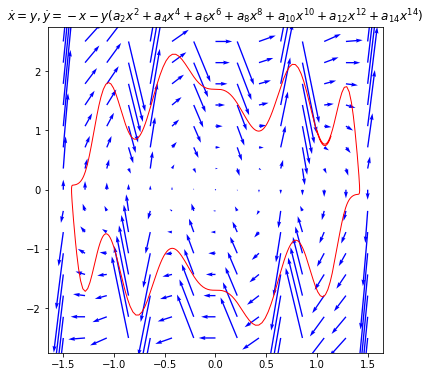

In [110]:
xlim = (-1.5, 1.5)
ylim = (-2.5, 2.5)

def dx_dt(x, t):
    a2, a4, a6, a8, a10, a12, a14 = 90, -882, 2598.4, -3359.997, 2133.34, -651.638, 76.38
    return [x[1], -x[0] -x[1]*(a2*x[0]**2 + a4*x[0]**4 + a6*x[0]**6 + a8*x[0]**8 + a10*x[0]**10 + a12*x[0]**12 + a14 * x[0]**14)]

plt.figure(figsize=(6, 6))
plt.title('$\\dot{x} = y, \\dot{y} = -x -y(a_2x^2 + a_4x^4 + a_6x^6 + a_8x^8 + a_{10}x^{10} + a_{12}x^{12} + a_{14}x^{14})$')

plot_traj([1, 1], dx_dt, fw=7, bw=0, n_time_samples=500)

plot_field(dx_dt, xlim, ylim, scale=50)

plt.xlim(np.array(xlim) * 1.1)
plt.ylim(np.array(ylim) * 1.1)

plt.show()

## Perturbation methods

In [218]:
x0, x1, x2, x, x_real = map(sp.Function, ['x0', 'x1', 'x2', 'x', 'x_real'])
t, eps = map(sp.Symbol, ['t', 'eps'])

x = x0(t) + eps*x1(t) + eps**2*x2(t)
expr = x.diff(t) + x - eps*x**2
equations = list(reversed(sp.Poly(expr, eps).coeffs()))[:3]
for eq in equations:
    display(eq)

x0(t) + Derivative(x0(t), t)

-x0(t)**2 + x1(t) + Derivative(x1(t), t)

-2*x0(t)*x1(t) + x2(t) + Derivative(x2(t), t)

In [219]:
x0_val, x1_val = map(lambda eq: eq.rhs, sp.dsolve(equations[:2], [x0(t), x1(t)], ics={x0(0): 2, x1(0): 0}))

In [220]:
x2_val = sp.dsolve(equations[2].subs({x0(t): x0_val, x1(t): x1_val}), x2(t), ics={x2(0): 0}).rhs

In [221]:
o1, o2, o3 = map(lambda expr: sp.lambdify(t, expr.subs({eps: 0.3})), [x0_val, x0_val + eps * x1_val, x0_val + eps * x1_val + eps**2*x2_val])

In [222]:
x_real_sol = sp.dsolve(x_real(t).diff(t) + x_real(t) - eps*x_real(t)**2, ics={x_real(0): 2})

In [223]:
real_x = sp.lambdify(t, x_real_sol.subs({eps: 0.3}).rhs)

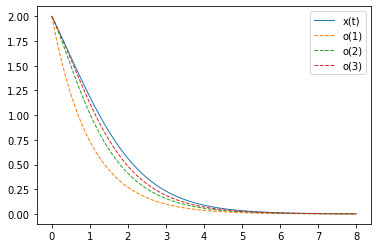

In [224]:
t = np.linspace(0, 8, 100)

plt.plot(t, real_x(t), label='x(t)', linewidth=1)

for name, o in zip(['o(1)', 'o(2)', 'o(3)'], [o1, o2, o3]):
    plt.plot(t, o(t), label=name ,linestyle='--', linewidth=1)
    
plt.legend()
plt.show()